#  Restricted Boltzmann Machines (RBMs) and Deep Belief Networks (DBNs) from scratch for representation learning on the MNIST dataset.

All of the code has been written based on "A Practical Guide to Training Restricted Boltzmann Machines" by Geoffrey Hinton and "A fast learning algorithm for deep belief nets" by Geoffrey Hinton et al. Both of the papers can be found at literature/.

The documentation of the code generated by Sphinx is located docs/. cd to docs/ then make html, then open index.html at docs/_build/html with your fav browser.

Some of the code is credited to the TAs and lecturers of DD2437 Artificial Neural Networks and Deep Architectures, who delivered an amazing set of lectures and laboratories. Thanks for all, it was really educational! The code was part of a laboratory, the description of which (with much of the theoretical background) is located at literature/.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet

## RBMs for representation learning on the MNIST hand-written digits dataset

Train an RBM on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration, and observe the reconstruction loss over epochs.

The learned weigths are visualized and saved at rbm_viz/.


Starting a Restricted Boltzmann Machine with ndim_hidden: 400
learning CD1
iteration=      1 Reconstruction loss=24.9233
iteration=      2 Reconstruction loss=23.2923
iteration=      3 Reconstruction loss=22.9012
iteration=      4 Reconstruction loss=22.6438
iteration=      5 Reconstruction loss=22.4503
iteration=      6 Reconstruction loss=22.3348
iteration=      7 Reconstruction loss=22.2205
iteration=      8 Reconstruction loss=22.0795
iteration=      9 Reconstruction loss=22.0496
iteration=     10 Reconstruction loss=21.9565
iteration=     11 Reconstruction loss=21.9039
iteration=     12 Reconstruction loss=21.8014
iteration=     13 Reconstruction loss=21.7660
iteration=     14 Reconstruction loss=21.7334
iteration=     15 Reconstruction loss=21.6964
iteration=     16 Reconstruction loss=21.6833
iteration=     17 Reconstruction loss=21.6613
iteration=     18 Reconstruction loss=21.6274
iteration=     19 Reconstruction loss=21.6050
iteration=     20 Reconstruction loss=21.6005
iter

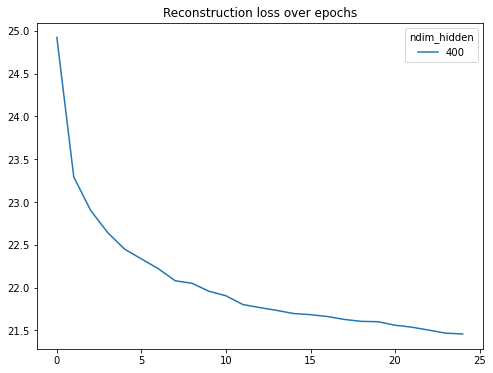

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""indices = np.random.choice(train_imgs.shape[0], 100, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)"""

epochs = 25
hidden = 400
print(f"\nStarting a Restricted Boltzmann Machine with ndim_hidden: {hidden}")


rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                 ndim_hidden=hidden,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=15)

loss_history = rbm.cd1(visible_trainset=train_imgs, n_iterations=epochs)
    
plt.figure(figsize=(8,6))
plt.plot(range(epochs), loss_history, label=hidden)

plt.title("Reconstruction loss over epochs")
plt.legend(title="ndim_hidden")
plt.savefig(f'single_rbm/loss_ndim_hidden_{hidden}.png')
plt.show()

Train several RBMs with different number of hidden layers on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration, and observe the reconstruction loss over epochs for each hidden layer dimension.

The learned weigths are visualized and saved at rbm_viz/.


Starting a Restricted Boltzmann Machine with ndim_hidden: 200
learning CD1
iteration=      1 Reconstruction loss=25.8106
iteration=      2 Reconstruction loss=23.7064
iteration=      3 Reconstruction loss=23.2007
iteration=      4 Reconstruction loss=22.9194
iteration=      5 Reconstruction loss=22.7189
iteration=      6 Reconstruction loss=22.6487
iteration=      7 Reconstruction loss=22.5289
iteration=      8 Reconstruction loss=22.4714
iteration=      9 Reconstruction loss=22.3749
iteration=     10 Reconstruction loss=22.2981
iteration=     11 Reconstruction loss=22.2936
iteration=     12 Reconstruction loss=22.2472
iteration=     13 Reconstruction loss=22.2202
iteration=     14 Reconstruction loss=22.1856
iteration=     15 Reconstruction loss=22.1321
iteration=     16 Reconstruction loss=22.1147
iteration=     17 Reconstruction loss=22.0970
iteration=     18 Reconstruction loss=22.0825
iteration=     19 Reconstruction loss=22.0269
iteration=     20 Reconstruction loss=22.0088
iter

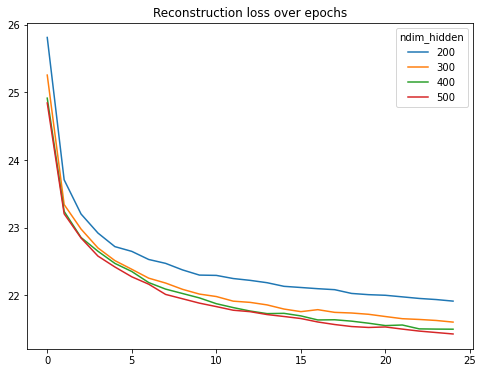

In [3]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""indices = np.random.choice(train_imgs.shape[0], 100, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)
"""


hidden_dims = [200, 300, 400, 500]
epochs = 25
loss_history = np.zeros((len(hidden_dims), epochs))
i = 0

for hidden in hidden_dims:
    print(f"\nStarting a Restricted Boltzmann Machine with ndim_hidden: {hidden}")
    rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                 ndim_hidden=hidden,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=15)

    loss_history[i] = rbm.cd1(visible_trainset=train_imgs, n_iterations=epochs)
    i += 1

plt.figure(figsize=(8,6))

for plots in range(len(hidden_dims)):
    plt.plot(range(epochs), loss_history[plots], label=hidden_dims[plots])

plt.title("Reconstruction loss over epochs")
plt.legend(title="ndim_hidden")
plt.savefig(f'single_rbm/loss_ndim_hidden_compare.png')
plt.show()

## DBNs for representation learning on the MNIST hand-written digits dataset

### DBN training

Train the DBN (from the Hinton paper) on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration and greedy layer-wise training, and observe the reconstruction losses per layer per epoch over the process.

Also, save the trained weigths of the layers at trained_rbm/, so they can be loaded (for recognition and generation).

In [10]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""np.random.seed(100)
indices = np.random.choice(train_imgs.shape[0], 10, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)
"""

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=10)

dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=100)


Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


### DBN as discriminative model

DBN as a recognition model. Check accuracy of recognition on the training and the test datasets.

In [11]:
print("Accuracy on training dataset is:")
dbn.recognize(train_imgs, train_lbls)

print("\nAccuracy on test dataset is:")
dbn.recognize(test_imgs, test_lbls)

Accuracy on training dataset is:
accuracy = 89.13%

Accuracy on test dataset is:
accuracy = 89.21%


### DBN as generative model

DBN as a generative model. Generate images from the learned posterior by labels.

Generation is done via alternating Gibbs sampling for k iterations (check dbn.py). There will be this many images generated. The generated images are stiched together and animated, and saved at dbn_mp4/.

Generating images by label with DBN...

Generated for label 0
Generated for label 1
Generated for label 2
Generated for label 3
Generated for label 4
Generated for label 5
Generated for label 6
Generated for label 7
Generated for label 8
Generated for label 9


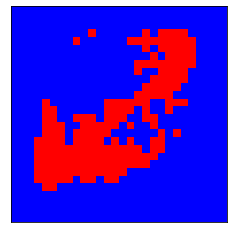

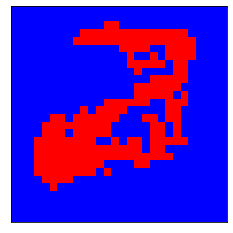

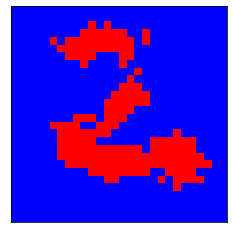

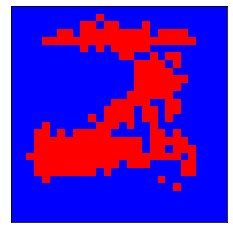

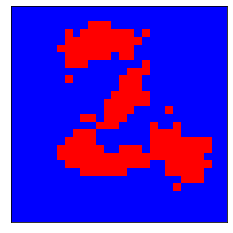

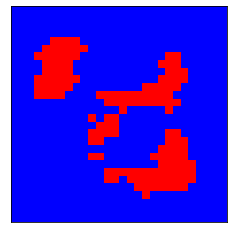

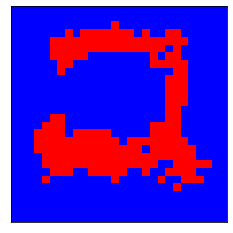

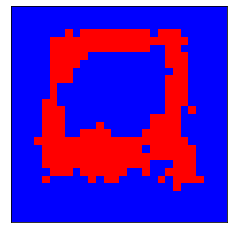

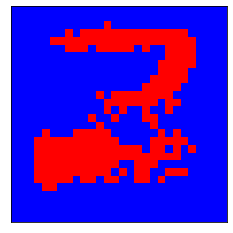

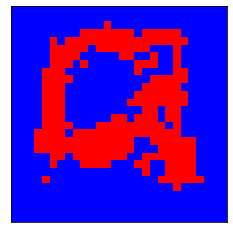

In [12]:
print("Generating images by label with DBN...\n")

for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    print(f"Generated for label {digit}")
    dbn.generate(digit_1hot, name="rbms")

## TODO
1. Supervised fine-tuning of recognition weights of DBN with the wake-sleep algorithm
2. Momentum parameter update in RBM for more robust gradient-based optimization